## Importações

In [20]:

import numpy as np

from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam
from keras.utils.np_utils import to_categorical
from keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [21]:
def plot_history(h):
    loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' in s]
    if len(loss_list) == 0:
        print('Custo não está presente no histórico')
        return
    epochs = range(1, len(history.history[loss_list[0]]) + 1)
    # Custo
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Custo [treinamento] (' + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Custo [validação] (' + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    plt.title('Custo')
    plt.xlabel('Épocas')
    plt.ylabel('Custo')
    plt.legend()
    # Acurácia
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Acurácia [treinamento] (' + str(format(
                    h.history[l][-1],'.5f'))+')')
    for l in val_acc_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Acurácia [validação] (' + str(format(
                    h.history[l][-1],'.5f'))+')')
    plt.title('Acurácia')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.show()

Epoch 1/50


c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
c:\Users\mathe\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


49/49 [==============================] - 0s 4ms/step - loss: 2.5419 - accuracy: 0.1266 - val_loss: 2.4522 - val_accuracy: 0.1796
Epoch 2/50
49/49 [==============================] - 0s 2ms/step - loss: 2.3605 - accuracy: 0.2403 - val_loss: 2.3460 - val_accuracy: 0.1796
Epoch 3/50
49/49 [==============================] - 0s 2ms/step - loss: 2.2278 - accuracy: 0.2997 - val_loss: 2.2518 - val_accuracy: 0.2036
Epoch 4/50
49/49 [==============================] - 0s 2ms/step - loss: 2.1065 - accuracy: 0.3333 - val_loss: 2.1666 - val_accuracy: 0.2156
Epoch 5/50
49/49 [==============================] - 0s 2ms/step - loss: 2.0030 - accuracy: 0.3902 - val_loss: 2.0841 - val_accuracy: 0.2455
Epoch 6/50
49/49 [==============================] - 0s 1ms/step - loss: 1.9120 - accuracy: 0.4083 - val_loss: 2.0099 - val_accuracy: 0.3054
Epoch 7/50
49/49 [==============================] - 0s 2ms/step - loss: 1.8379 - accuracy: 0.4341 - val_loss: 1.9540 - val_accuracy: 0.3174
Epoch 8/50
49/49 [=============

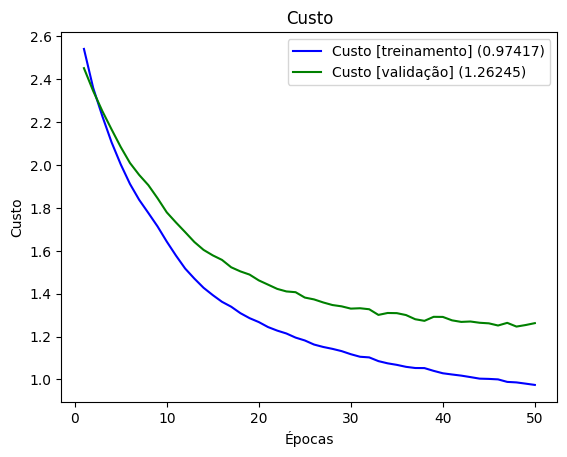

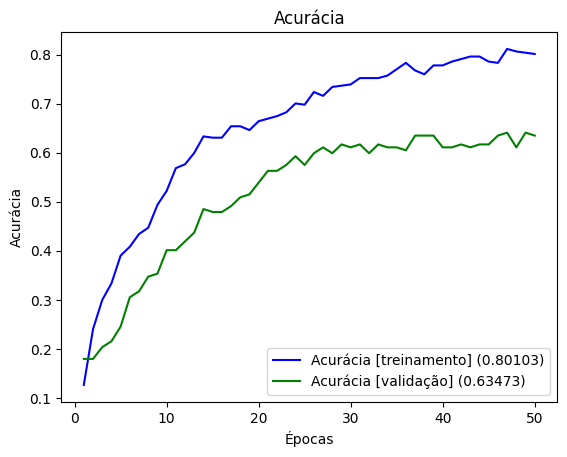

8/8 [==============================] - 0s 857us/step
Acurácia: 65.97%
Matriz de confusão:
[[19  4  3  1  0  1  0  2]
 [ 0 20  3  0  3  0  2  2]
 [ 0  6 15  0  1  1  1  3]
 [ 6  2  0 22  0  3  4  0]
 [ 0  1  1  4 13  1  3  4]
 [ 0  0  2  0  0 21  0  3]
 [ 0  0  0  3  0  0 24  5]
 [ 0  0  0  0  0  2  4 23]]
              precision    recall  f1-score   support

           0       0.76      0.63      0.69        30
           1       0.61      0.67      0.63        30
           2       0.62      0.56      0.59        27
           3       0.73      0.59      0.66        37
           4       0.76      0.48      0.59        27
           5       0.72      0.81      0.76        26
           6       0.63      0.75      0.69        32
           7       0.55      0.79      0.65        29

    accuracy                           0.66       238
   macro avg       0.67      0.66      0.66       238
weighted avg       0.67      0.66      0.66       238



In [25]:
# DATA/FEATURES
X = np.load('dataset.npy')

# LABELS
num_movements = 8 ## 8 movimentos
num_samples_per_movement = 99 ## 99
Y = [[str(i)] * num_samples_per_movement for i in range(1, num_movements + 1)]
Y = np.array(Y).flatten()

le = LabelEncoder()
Y = le.fit_transform(Y)

categorical_labels = to_categorical(Y, num_classes=len(set(Y)))

## Dividindo em conjuntos de treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, categorical_labels, test_size=0.3)

## treino: 80% dos 80% de treino. teste: 20% dos 80% de treino.
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.3, shuffle=True)

## definição de uma fração do regularizador
l = 0.01

## desenvolvimento do modelo Keras para uma MLP
model = Sequential()

model.add(Dense(50, activation='relu', input_dim=18,
                kernel_regularizer=regularizers.l2(l)))

model.add(Dense(10, activation='relu',
                kernel_regularizer=regularizers.l2(l)))

model.add(Dense(8, activation='softmax'))

# Aplicação de um modelo de descida de gradiente utilizando o Stocastic Gradient Descendent (SGD)
sgd = SGD(lr=0.01, momentum=0.9)

# Função de otimização da rede: ADAM
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Função de custo baseada em dados originalmente categóricos
model.compile(loss='categorical_crossentropy', optimizer=adam,
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=30, verbose=1, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=150, batch_size=8,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])


plot_history(history)

# Fazer previsões para o conjunto de teste
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Converter os rótulos verdadeiros de volta para as categorias originais
y_true = np.argmax(y_test, axis=1)

# Calcular a acurácia
accuracy = accuracy_score(y_true, y_pred)
print('Acurácia: %.2f%%' % (accuracy * 100))

# Calcular a matriz de confusão
confusion = confusion_matrix(y_true, y_pred)
print('Matriz de confusão:')
print(confusion)

# Gerar o relatório de classificação
report = classification_report(y_true, y_pred, digits=2)
print(report)